In [100]:
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
import numpy as np
import pandas as pd

In [102]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [122]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [104]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [105]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect = True)
base.classes.keys()
measurement=base.classes.measurement
station=base.classes.station
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()
# reflect the tables

['measurement', 'station']

In [106]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [107]:
# We can view all of the classes that automap found
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28310395af0>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01'}

In [108]:
# Save references to each table
first_row1 = session.query(station).first()
first_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2831b6c1cd0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [109]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [144]:

results = session.query(measurement.date, measurement.prcp, measurement.tobs,measurement.station).filter(measurement.date > '2016-08-23').order_by(measurement.date).all()



In [146]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip = pd.DataFrame(results, columns=['Date','Precipitation',"tobs","station"])
precip = precip.set_index("Date")
precip = precip.dropna()
precip.head(10)


,Precipitation,tobs,station
Date,,,
2016-08-24,0.08,79.0,USC00519397
2016-08-24,2.15,76.0,USC00513117
2016-08-24,2.28,80.0,USC00514830
2016-08-24,1.22,79.0,USC00519523
2016-08-24,2.15,77.0,USC00519281
2016-08-24,1.45,74.0,USC00516128
2016-08-25,0.08,80.0,USC00519397
2016-08-25,0.08,77.0,USC00513117
2016-08-25,0.00,81.0,USC00514830


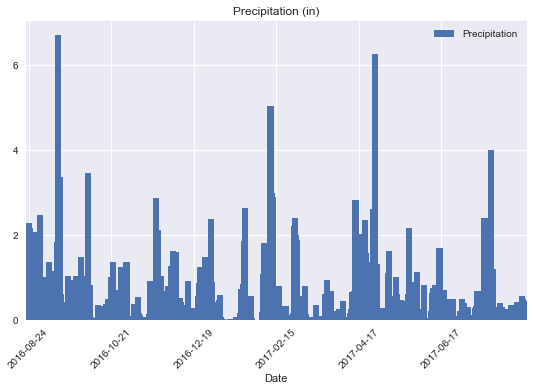

In [169]:
ax1 = precip.plot.bar( y = "Precipitation", title="Precipitation (in)", width = 25)
ax1 = plt.locator_params(nbins=6)
ax1 = plt.xticks(rotation = 45)
plt.show()


In [147]:
precip.describe()

,Precipitation,tobs
count,2015.000000,2015.000000
mean,0.176462,74.484367
std,0.460288,4.629750
min,0.000000,58.000000
25%,0.000000,71.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


In [179]:
# Design a query to show how many stations are available in this dataset?
commonStation = precip.loc[precip["station"] == "USC00519397"]
commonStation = commonStation.drop(columns = "Precipitation")

In [180]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
precip["station"].value_counts()

USC00519397    358
USC00519281    351
USC00513117    342
USC00516128    327
USC00519523    313
USC00514830    264
USC00517948     60
Name: station, dtype: int64

In [181]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
commonStation.describe()

,tobs
count,358.000000
mean,75.181564
std,4.970839
min,60.000000
25%,72.000000
50%,77.000000
75%,79.000000
max,87.000000


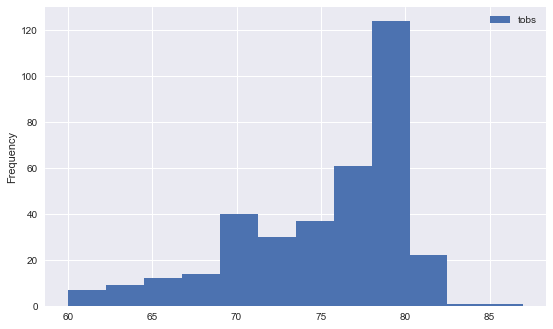

In [188]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
ax2 = commonStation.plot.hist(station, bins = 12)

## Bonus Challenge Assignment

In [118]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
